# Problem
#### Demographic:
Which 2 demographics have proven to be the most popular with the telco brand?
If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

#### Services:
Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

#### Payment: (Use visualizations in explaining your analysis)
If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
Basic
Plus
Premium

Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
ply.offline.init_notebook_mode(connected=True)
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from pandas_profiling import ProfileReport

# Loading the data

In [2]:
telcom= pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
telcom.shape

(7043, 21)

# Exploratory Data Analysis

Instead of the usual manual EDA performed by the individual we will use pandas-profiling which is faster and more specific

In [6]:
profile = ProfileReport(telcom,title="Telcom data",explorative=True)
profile

From the above EDA we find that there are no missing values within the dataset.
We proceed to solve the problem-specific questions listed at the begining of the notebook

### Question 1: Which demographics have proven to be the most popular with the telco brand?

Demographics = SeniorCitizen, Gender, Dependents,Partner

#### Senior Citizen

In [7]:
#From the EDA above we can see that only SeniorCitizen is in binary form. We replace the values to be in yes,no format to have consistency
telcom['SeniorCitizen'] = telcom['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [8]:
names=['No','Yes']
values=telcom.SeniorCitizen.value_counts()
fig = px.pie(telcom, values=values, title='Senior Citizen',names=names)
fig.show()

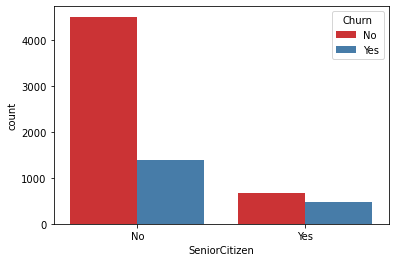

In [9]:
sns.countplot(x='SeniorCitizen', hue = 'Churn', data = telcom,palette='Set1');

#### Dependents

In [10]:
# First display the frequency in terms of a plotly pie chart
names=['No','Yes']
values=telcom.Dependents.value_counts()
fig = px.pie(telcom, values=values, title='Dependents',names=names)
fig.show()

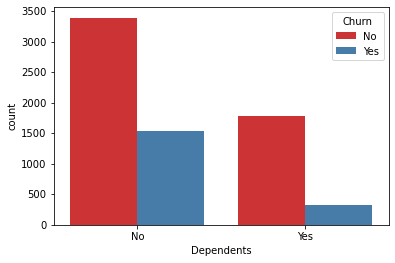

In [11]:
sns.countplot(x='Dependents', hue = 'Churn', data = telcom, palette='Set1');

#### Partners

In [12]:
names=['No','Yes']
values=telcom.Partner.value_counts()
fig = px.pie(telcom, values=values, title='Partners',names=names)
fig.show()

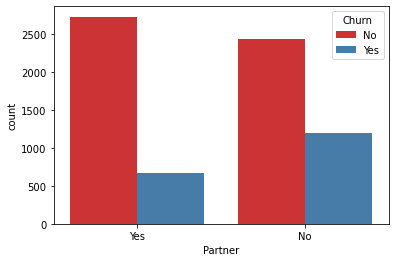

In [13]:
sns.countplot(x='Partner', hue = 'Churn', data = telcom,palette='Set1');

#### Gender

In [14]:
names=['Male','Female']
values=telcom.gender.value_counts()
fig = px.pie(telcom, values=values, title='gender',names=names)
fig.show()

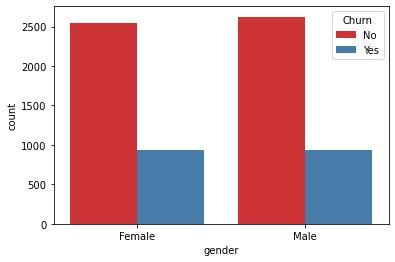

In [15]:
sns.countplot(x='gender', hue = 'Churn', data = telcom,palette='Set1');

#### Observations from pie charts
From the distribution of the four columns it is clear that partners and gender are more or less almost equally distributed and thus we will not consider them for question 1
#### Conclusion
The younger generation is more popular than senior citizens

Individuals with no dependents make for a better part of the customers

### Question 2: If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

 Customer retention is the opposite of customer churn.
We thus use countplots to find out which groups of people are less likely to churn


###### Refer to the countplots beneath the pie charts 
#### Conclusion
Considering the ratio of retained versus churned customers per demographic group it is clear that:
 
    The younger generation
    Individuals with dependents 
    Individuals with partners 
 
 make for the best target audience for the marketing team

## Question 3: Which 3 services are contributing to a higher monthly charge and resulting to customers churning?

Services = PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

For this question we need to dummy encode all categorical variables in order to find the correlation between all variables. To do this we also have to convert Total Charges to numeric to prevent it from being considered a categorical variable

In [16]:
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges,errors='coerce')
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telcom.dropna(inplace = True)

In [18]:
# Drop CustomerID as it is also considered a categorical variable 
telcom_new = telcom.drop(['customerID'], axis=1)


In [19]:
#Converting the predictor variable in a binary numeric variable
telcom_new['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telcom_new['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [20]:
telcom_dummies = pd.get_dummies(telcom_new)
telcom_dummies.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### METHOD 1: Correlation bar plots

<AxesSubplot:>

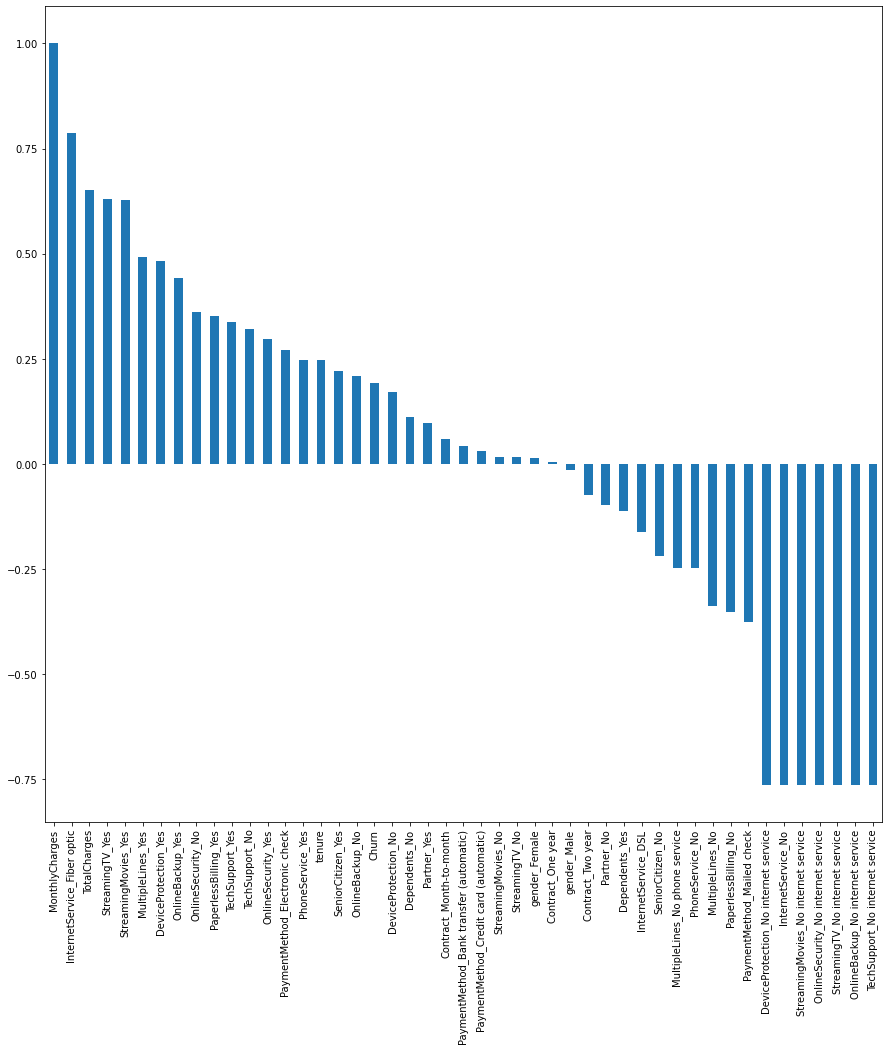

In [21]:
#We proceed to find all variables having a correlation with churn while keeping an eye on the services 
plt.figure(figsize=(15,15))
telcom_dummies.corr()['MonthlyCharges'].sort_values(ascending = False).plot(kind='bar')

From the above we can see that the top services contributing to high monthly rates are:
        
    Fiber Optic Internet Service
    StreamingTV
    StreamingMovies
But do they contribute to the churn?

<AxesSubplot:>

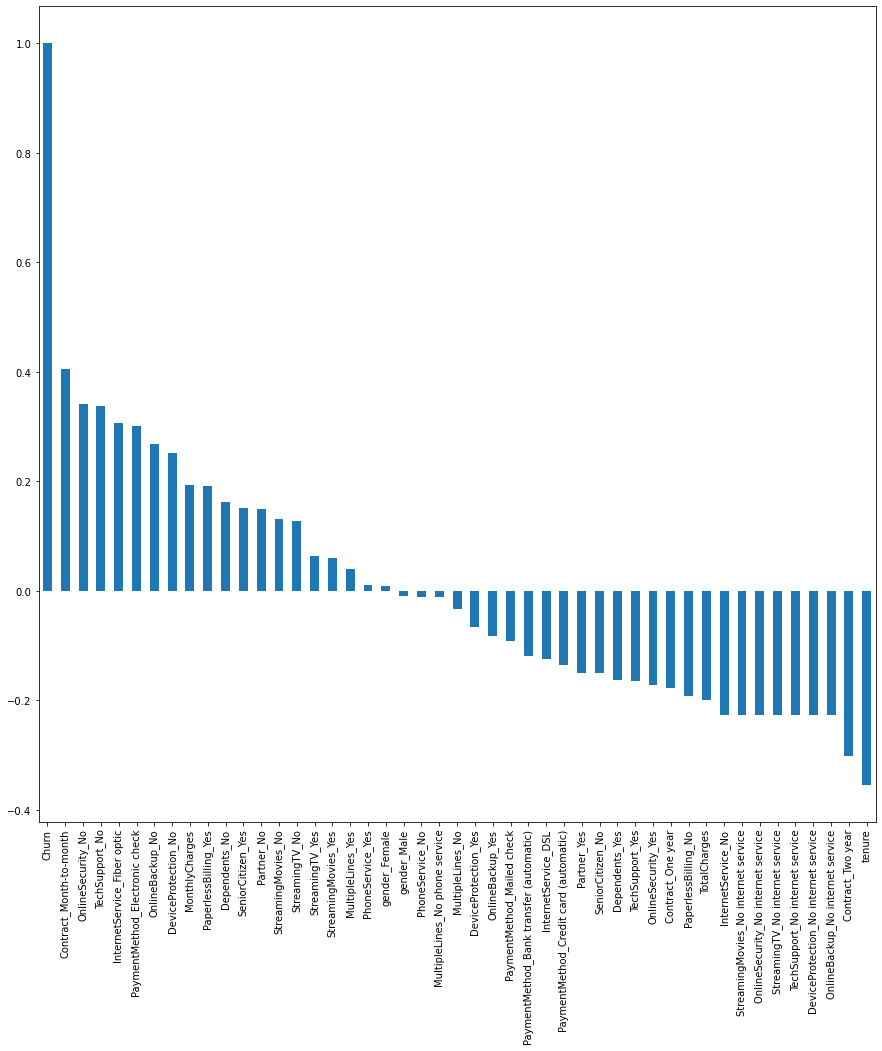

In [22]:
plt.figure(figsize=(15,15))
telcom_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

We can say that the following services have a positive correlation to the churn rate:

             No Online Security
             No Tech Support
             FiberOptic Internet Service
        

But only Fiber Optic Internet service contributes to a high monthly charge.


### METHOD 2: Filter Method

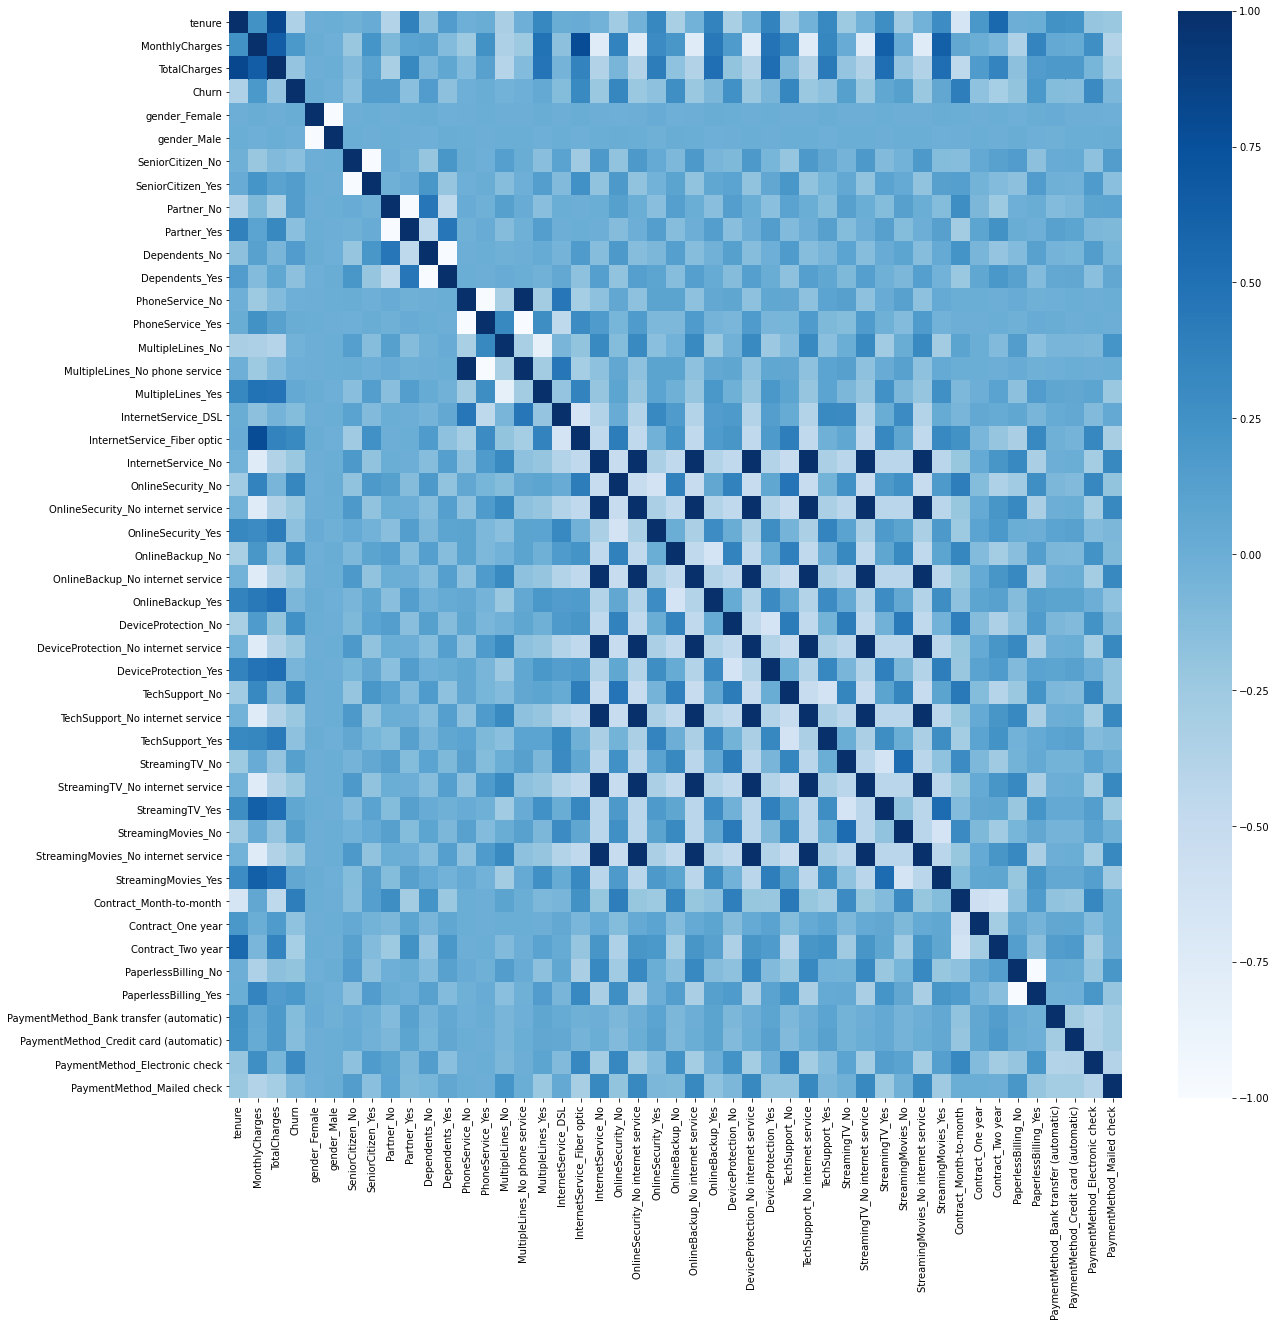

In [23]:
# Plotting  a correlation heatmap. We won't use annotations because the map is too large 
plt.figure(figsize=(20,20))
cor = telcom_dummies.corr()
sns.heatmap(cor, cmap=plt.cm.Blues)
plt.show()

In [24]:
#Correlation with churn
cor_target = (cor["Churn"])
cor_target 

tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
SeniorCitizen_No                          -0.150541
SeniorCitizen_Yes                          0.150541
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

In [25]:
#Correlation with monthlycharges
cor_charges = (cor["MonthlyCharges"])
cor_charges 

tenure                                     0.246862
MonthlyCharges                             1.000000
TotalCharges                               0.651065
Churn                                      0.192858
gender_Female                              0.013779
gender_Male                               -0.013779
SeniorCitizen_No                          -0.219874
SeniorCitizen_Yes                          0.219874
Partner_No                                -0.097825
Partner_Yes                                0.097825
Dependents_No                              0.112343
Dependents_Yes                            -0.112343
PhoneService_No                           -0.248033
PhoneService_Yes                           0.248033
MultipleLines_No                          -0.338514
MultipleLines_No phone service            -0.248033
MultipleLines_Yes                          0.490912
InternetService_DSL                       -0.161368
InternetService_Fiber optic                0.787195
InternetServ

In [26]:
#Selecting highly correlated features in monthly charges
relevant_features = cor_charges[cor_charges>0.3]
relevant_features

MonthlyCharges                 1.000000
TotalCharges                   0.651065
MultipleLines_Yes              0.490912
InternetService_Fiber optic    0.787195
OnlineSecurity_No              0.360220
OnlineBackup_Yes               0.441529
DeviceProtection_Yes           0.482607
TechSupport_No                 0.321267
TechSupport_Yes                0.338301
StreamingTV_Yes                0.629668
StreamingMovies_Yes            0.627235
PaperlessBilling_Yes           0.351930
Name: MonthlyCharges, dtype: float64

In [27]:
#Selecting highly correlated features with churn
relevant_features1 = cor_target[cor_target>0.15]
relevant_features1

MonthlyCharges                    0.192858
Churn                             1.000000
SeniorCitizen_Yes                 0.150541
Dependents_No                     0.163128
InternetService_Fiber optic       0.307463
OnlineSecurity_No                 0.342235
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
TechSupport_No                    0.336877
Contract_Month-to-month           0.404565
PaperlessBilling_Yes              0.191454
PaymentMethod_Electronic check    0.301455
Name: Churn, dtype: float64

We therefore conclude that the most expensive services that result to customer churning are:
        
        Fiber Optic Internet Services
    

## Question 4: If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [28]:
# First we have to find out what phone services entail
telcom.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [29]:
telcom.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

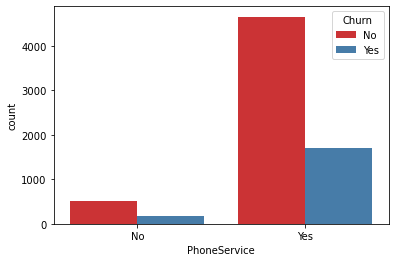

In [30]:
# We then proceed to find the relationship between Phone Services and Churn
sns.countplot(x='PhoneService', hue = 'Churn',palette='Set1',data = telcom)

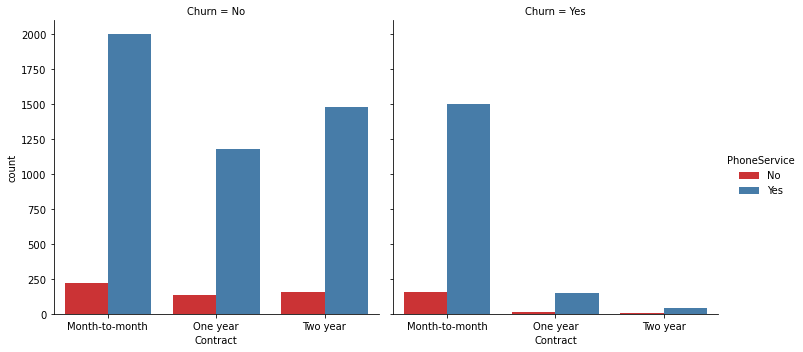

In [31]:
# we also consider the contract type
sns.catplot(x="Contract", hue="PhoneService", col="Churn",data=telcom,palette='Set1', kind="count");

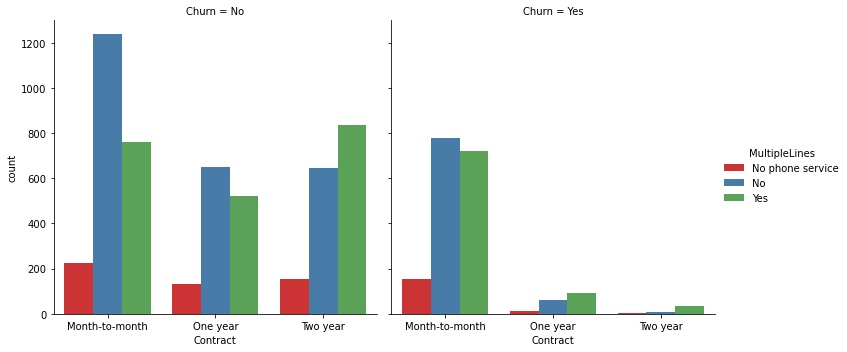

In [32]:
#We now consider Multiple lines to see the distribution of various phone services
sns.catplot(x="Contract", hue="MultipleLines", col="Churn",data=telcom, palette='Set1', kind="count");

Using the churn ratio we can see that a 2 year contract with multiple lines is more viable for customer retention

## Question 5: If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning: Basic Plus Premium

In [33]:
#https://medium.com/swlh/classification-analysis-on-telco-customer-churn-a01599ad28d7

In [34]:
# We start by considering payment attributes of clients. Three features can be used
pricing = ['tenure', 'MonthlyCharges', 'TotalCharges']
telcom[pricing].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


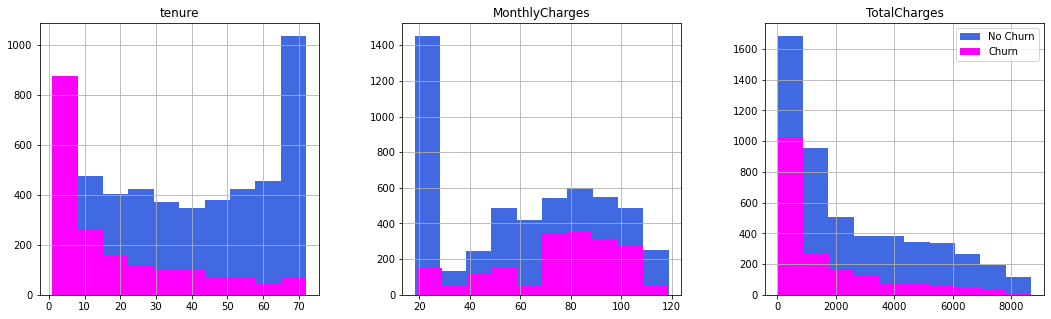

In [35]:
# We proceed to use plots to find the churn rate and where we can split the data into groups
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
telcom[telcom.Churn == 'No'][pricing].hist(color='royalblue', ax=ax)
telcom[telcom.Churn == 'Yes'][pricing].hist(color='fuchsia', ax=ax)
plt.legend(['No Churn', 'Churn'])


In [36]:
# change MonthlyCharges to categorical column
def monthlycharges_split(telcom) :
    if telcom['MonthlyCharges'] <= 30 :
        return '0–30'
    elif (telcom['MonthlyCharges'] > 30) & (telcom['MonthlyCharges'] <= 70 ):
        return '30–70'
    elif (telcom['MonthlyCharges'] > 70) & (telcom['MonthlyCharges'] <= 99 ):
        return '70–99'
    elif telcom['MonthlyCharges'] > 99 :
        return '99plus'
telcom['MonthlyCharges_group'] = telcom.apply(lambda telcom:monthlycharges_split(telcom), axis = 1)

# change TotalCharges to categorical column
def totalcharges_split(telcom) :
    if telcom['TotalCharges'] <= 2000 :
        return '0–2k'
    elif (telcom['TotalCharges'] > 2000) & (telcom['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (telcom['TotalCharges'] > 4000) & (telcom['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif telcom['TotalCharges'] > 6000 :
        return '6kplus'
telcom['TotalCharges_group'] = telcom.apply(lambda telcom:totalcharges_split(telcom), axis = 1)

# change Tenure to categorical column

def tenure_split(telcom) : 
    if telcom['tenure'] <= 20 :
        return '0–20'
    elif (telcom['tenure'] > 20) & (telcom['tenure'] <= 40 ):
        return '20–40'
    elif (telcom['tenure'] > 40) & (telcom['tenure'] <= 60) :
        return '40–60'
    elif telcom['tenure'] > 60 :
        return '60plus'
telcom['tenure_group'] = telcom.apply(lambda telcom:tenure_split(telcom), axis = 1)


In [37]:
new_pricing = ['tenure_group', 'MonthlyCharges_group', 'TotalCharges_group']

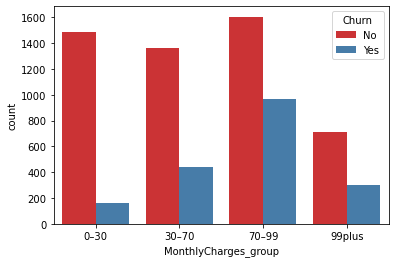

In [38]:
# from the newly created groups we can explore which groups have a lower churn 
sns.countplot(x='MonthlyCharges_group', hue = 'Churn', data = telcom, palette='Set1');

We see that from the split price groups only 3 groups have a fair churn to retention ratio


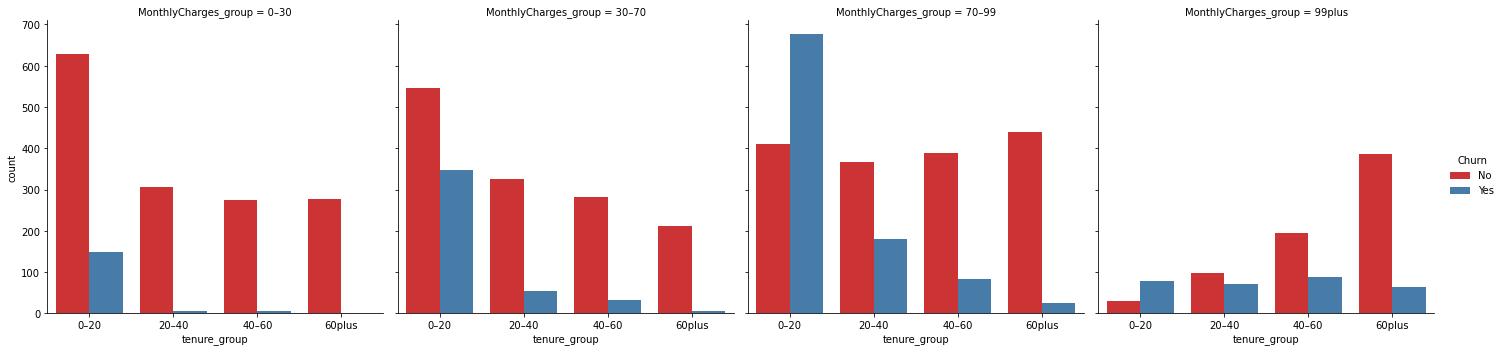

In [39]:
# However these are not the only facors to consider in creating packages
# We therefore proceed to find the implication of tenure_groups in monthly_charges
sns.catplot(x="tenure_group", col='MonthlyCharges_group', hue="Churn",data= telcom,palette='Set1', kind="count");

It is clear that tenure_group 0-20 has a high churn rate

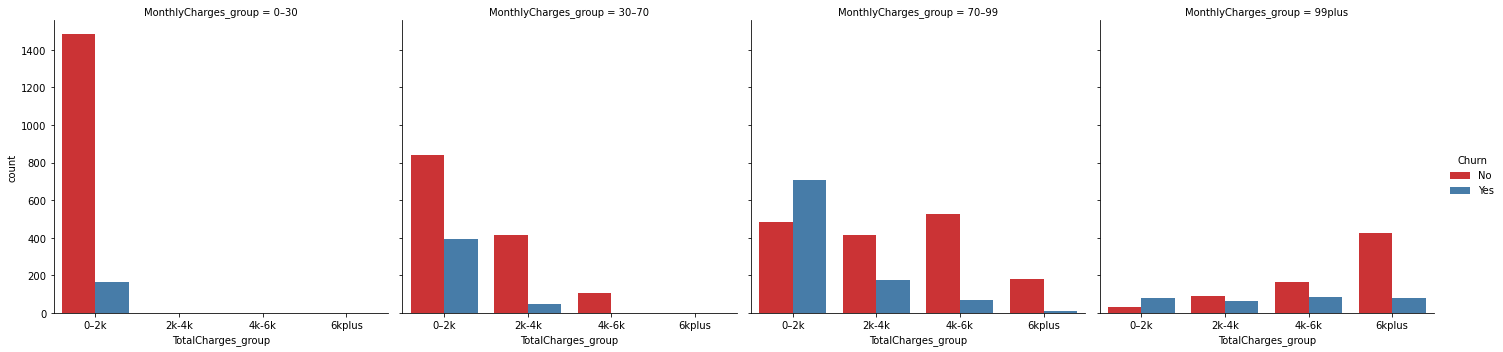

In [40]:
# Further exploration with totalcharges_group reveals that it does not necessarily have to be considered
sns.catplot(x="TotalCharges_group", col='MonthlyCharges_group', hue="Churn",data= telcom,palette='Set1', kind="count");

We therefore come to the conclusion that the best prices and tenire for each package is as follows:
     
      Basic Package   : Monthly Price 0$ -30$ , Tenure = 20 - 40
      Plus Package    : Monthly Price 30$ -70$ , Tenure = 40 - 60
      Premium Package : Monthly Price 70$ -99$ , Tenure = 60 plus

## Question 6:Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

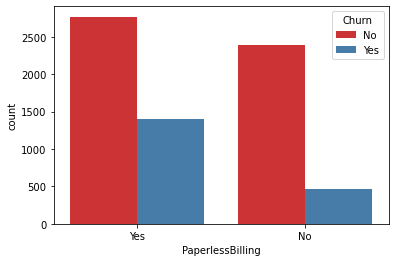

In [41]:
sns.countplot(x='PaperlessBilling', hue = 'Churn',palette='Set1',data = telcom)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

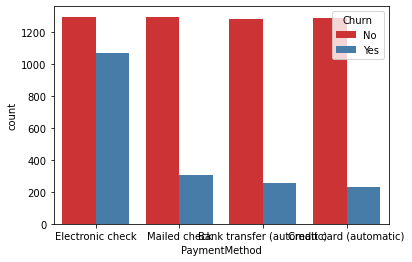

In [42]:
sns.countplot(x='PaymentMethod', hue = 'Churn',palette='Set1',data = telcom)

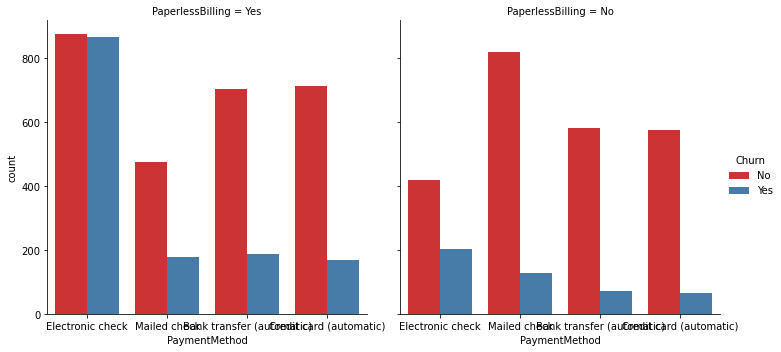

In [43]:
sns.catplot(x="PaymentMethod", col='PaperlessBilling', hue="Churn",data= telcom,palette='Set1', kind="count");

The company should not go paperless for their monthly billings.

It is clear from the above graphs that paperless billing results in more churning of clients

The assumption is that most clients are used to the old manual way of billing and find it hard to adjust to paperless billing